In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df=pd.read_csv("C:/Users/LENOVO/OneDrive/Documents/CODING/DATA SCIENCE/Codebasics/ML/5_one_hot_encoding/Exercise/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


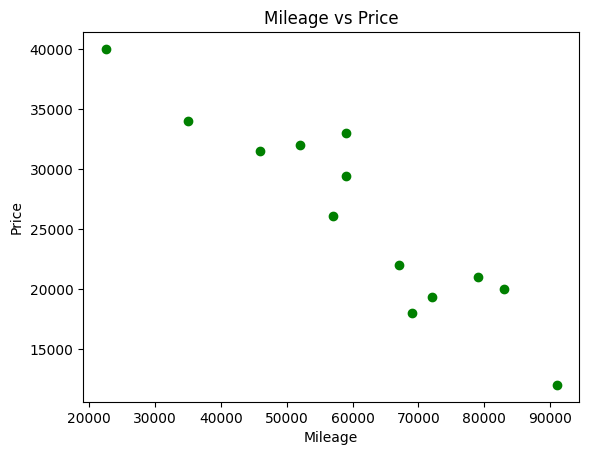

In [5]:
plt.title('Mileage vs Price')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(df['Mileage'],df['Sell Price($)'],color='green')

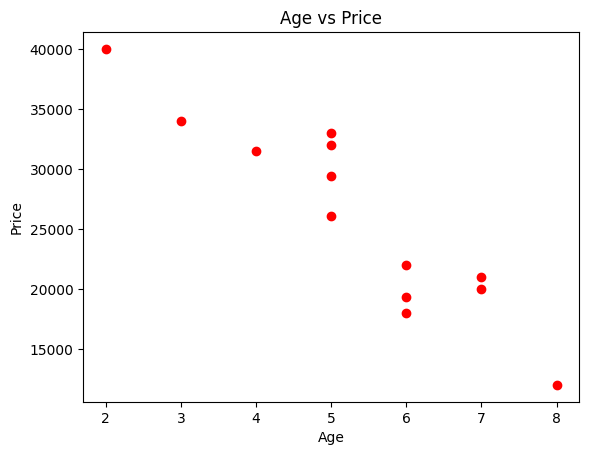

In [6]:
plt.title('Age vs Price')
plt.xlabel("Age")
plt.ylabel("Price")
plt.scatter(df['Age(yrs)'],df['Sell Price($)'],color='red')

In [9]:
df_n=pd.get_dummies(df['Car Model'])
df_n=df_n.astype(int)
df_n

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [10]:
merge=pd.concat([df,df_n],axis='columns')
merge

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [12]:
final=merge.drop(['Car Model','Mercedez Benz C class'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [13]:
X=final.drop(['Sell Price($)'],axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [15]:
y=final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [17]:
X_train

,Mileage,Age(yrs),Audi A5,BMW X5
12,59000,5,0,0
2,57000,5,0,1
10,83000,7,0,0
0,69000,6,0,1
1,35000,3,0,1
8,91000,8,1,0
11,79000,7,0,0
5,59000,5,1,0
4,46000,4,0,1


In [18]:
X_test

,Mileage,Age(yrs),Audi A5,BMW X5
7,72000,6,1,0
3,22500,2,0,1
6,52000,5,1,0
9,67000,6,0,0


In [19]:
y_train

12    33000
2     26100
10    20000
0     18000
1     34000
8     12000
11    21000
5     29400
4     31500
Name: Sell Price($), dtype: int64

In [20]:
y_test

7    19300
3    40000
6    32000
9    22000
Name: Sell Price($), dtype: int64

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [22]:
reg.fit(X_train,y_train)

LinearRegression()

In [23]:
reg.predict(X_test)

array([22825.06479093, 42184.78341296, 31161.68085877, 27445.53868941])

In [24]:
y_test

7    19300
3    40000
6    32000
9    22000
Name: Sell Price($), dtype: int64

In [25]:
reg.score(X_test,y_test)

0.824689537293462

In [27]:
reg.predict([[45000,4,0,0]])

C:\Users\LENOVO\AppData\Local\Programs\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38864.71677129])

In [28]:
reg.predict([[86000,7,0,1]])

C:\Users\LENOVO\AppData\Local\Programs\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11155.7571273])